## 2D Spiral Classification


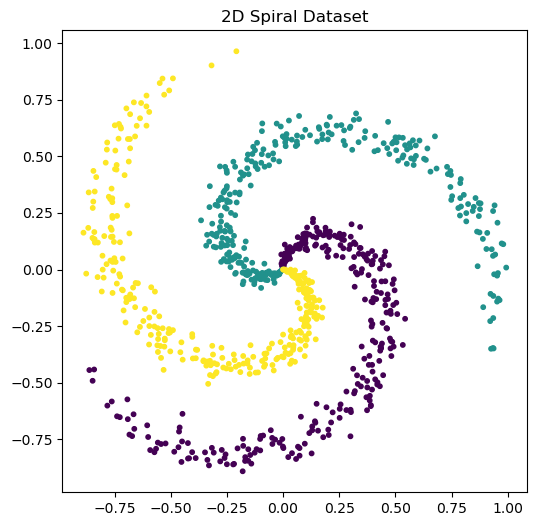

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_spiral(n_points=1000, n_classes=3, noise=0.2):
    X = np.zeros((n_points * n_classes, 2))
    y = np.zeros(n_points * n_classes, dtype='uint8')

    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * noise
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    return X, y

# Generate data
X, y = make_spiral(n_points=300, n_classes=3)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="viridis")
plt.title("2D Spiral Dataset")
plt.show()


In [3]:
from scratch.nn.linear import Linear
from scratch.nn.activations import ReLU, Sigmoid
from scratch.nn.sequential import Sequential
from scratch.nn.loss import Loss
from scratch.nn.optim import Adam
from scratch.trainer import Trainer
from scratch.tensor import Tensor
from scratch.dataloader import DataLoader

model = Sequential(
    Linear(2, 64),
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 3)
)


opt = Adam(model.parameters(), lr=0.001)  # Lower learning rate for better convergence
loss = Loss.cross_entropy


2025-11-21 22:12:38.161 | INFO     | scratch.env:<module>:15 - True


In [4]:
y_int = y.astype(int)

data = DataLoader(
    X, 
    y_int,   # shape (N,) - keep as 1D for cross_entropy loss
    batch_size=32,
    shuffle=True
)

In [5]:
data

In [6]:
trainer = Trainer(model, opt, loss)
trainer.fit(data, epochs=5000)


2025-11-21 22:12:44.133 | INFO     | scratch.trainer:fit:23 - Training model for 8 parameters for 5000 epochs
Epochs: 100%|██████████| 5000/5000 [09:45<00:00,  8.53it/s]
2025-11-21 22:22:30.071 | INFO     | scratch.trainer:fit:52 - Training time: 585.93 seconds
2025-11-21 22:22:30.369 | INFO     | scratch.utils:wrapper:86 - 
MEMORY PROFILE: fit
2025-11-21 22:22:30.372 | INFO     | scratch.utils:wrapper:87 - Current: 43.94 MB | Peak: 94.63 MB
2025-11-21 22:22:30.375 | INFO     | scratch.utils:wrapper:88 - 
Top 10 allocations:
2025-11-21 22:22:30.378 | INFO     | scratch.utils:wrapper:90 - /home/dw/Documents/projects/scratch/scratch/tensor.py:5: size=20.8 MiB (+20.8 MiB), count=5925 (+5925), average=3687 B
2025-11-21 22:22:30.381 | INFO     | scratch.utils:wrapper:90 - /home/sanketdeshpande/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:129: size=20.8 MiB (+20.8 MiB), count=5451 (+5451), average=3999 B
2025-11-21 22:22:30.385 | INFO     | scratch.utils:wrapper:90 - /home/dw

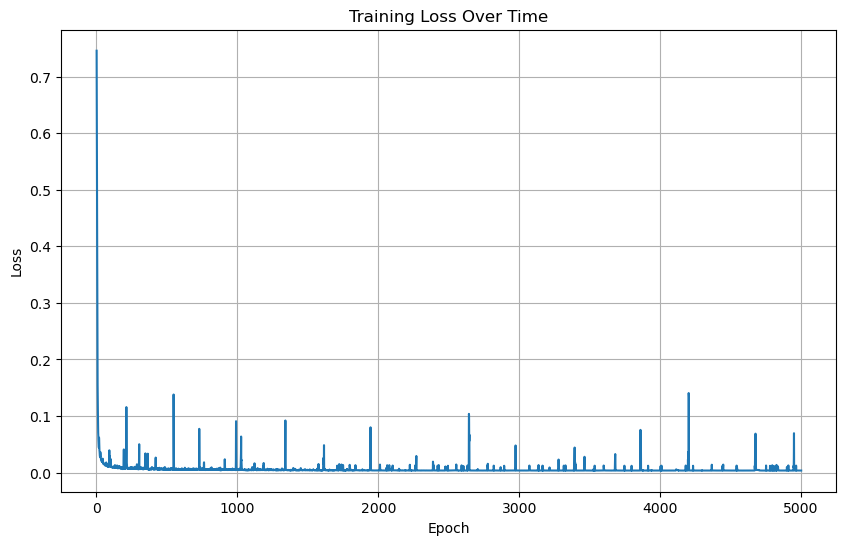

In [7]:
from scratch.utils import plot_history
plot_history(trainer.history[1:])


In [8]:
trainer.history[:10]

[(1, 0.9332869628380085),
 (2, 0.7456149088925329),
 (3, 0.6707358596653774),
 (4, 0.5741851052333569),
 (5, 0.49520508379771794),
 (6, 0.39607998214918994),
 (7, 0.28887382201079664),
 (8, 0.21005629465497774),
 (9, 0.15512307681914034),
 (10, 0.1203258553969449)]